In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm 

plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
# read in the cleaned csv dataset 
sf_df = pd.read_csv("./Building_Permits_Clean.csv")

In [3]:
# rename columns to make it useable for plot scatter 
sf_df.rename(columns={"Permit Type": "Permit_type", 
                                  "Street Number":"Street_number", 
                                  "Number of Existing Stories": "Nr_of_existing_stories",
                                  "Estimated Cost":"Estimated_cost",
                                  "Revised Cost":"Revised_cost"}, inplace=True)

#sf_df.rename(columns = {"Permit Type": "Permit_type", 
                                 # "Street Number":"Street_number", 
                                  #"Number of Existing Stories": "Nr_of_existing_stories"
                                  #"Estimated Cose": "Estimated_cost"
                                  #"Revised Cost": "Revised_cost"}) 

In [13]:
sf_df.columns

Index(['Unnamed: 0', 'Permit_type', 'Permit Creation Date', 'Block', 'Lot',
       'Street_number', 'Street Name', 'Street Suffix', 'Current Status',
       'Current Status Date', 'Filed Date', 'Issued Date',
       'First Construction Document Date', 'Nr_of_existing_stories',
       'Permit Expiration Date', 'Estimated_cost', 'Revised_cost',
       'Existing Use', 'Existing Units', 'Plansets',
       'Existing Construction Type', 'Supervisor District',
       'Neighborhoods - Analysis Boundaries', 'Zipcode'],
      dtype='object')

In [17]:
#Split the data fields

date_columns = [
    'Permit Creation Date',
    'Current Status Date',
    'Filed Date',
    'Issued Date',
    'First Construction Document Date',
    'Permit Expiration Date'
]

def splitDates(column):
    name = column[0:-4]
    sf_df[name+'Year'] = sf_df[column].astype(str).str[-4:]
    sf_df[name+'Year'] = pd.to_numeric(sf_df[name+'Year'], errors='coerce')
    sf_df[name+'Day'] = sf_df[column].astype(str).str[3:5]
    sf_df[name+'Day'] = pd.to_numeric(sf_df[name+'Day'], errors='coerce')
    sf_df[name+'Month'] = sf_df[column].astype(str).str[0:2]
    sf_df[name+'Month'] = pd.to_numeric(sf_df[name+'Month'], errors='coerce')
    
for column in date_columns:
    splitDates(column)
 
pd.set_option('display.max_columns', 50)
sf_df.sample(5)



,Unnamed: 0,Permit_type,Permit Creation Date,Block,Lot,Street_number,Street Name,Street Suffix,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Nr_of_existing_stories,Permit Expiration Date,Estimated_cost,Revised_cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Permit Creation Year,Permit Creation Day,Permit Creation Month,Current Status Year,Current Status Day,Current Status Month,Filed Year,Filed Day,Filed Month,Issued Year,Issued Day,Issued Month,First Construction Document Year,First Construction Document Day,First Construction Document Month,Permit Expiration Year,Permit Expiration Day,Permit Expiration Month
120653,167038,3,06/24/2014,5949,020A,43,Edinburg,St,expired,08/07/2017,06/24/2014,05/02/2016,10/18/2016,1.0,04/27/2017,50000.0,79200.0,1 family dwelling,1.0,2.0,5.0,11.0,Excelsior,94112.0,2014,24,6,2017,7,8,2014,24,6,2016,2,5,2016,18,10,2017,27,4
134625,184615,8,10/02/2017,3777,048,168,Welsh,St,issued,11/01/2017,10/02/2017,11/01/2017,11/01/2017,2.0,03/01/2018,1.0,1.0,"warehouse,no frnitur",0.0,2.0,3.0,6.0,South of Market,94107.0,2017,2,10,2017,1,11,2017,2,10,2017,1,11,2017,1,11,2018,1,3
120256,166166,8,07/05/2017,3581,029A,3990,18th,St,complete,08/25/2017,07/05/2017,07/05/2017,07/05/2017,2.0,06/30/2018,30000.0,30000.0,apartments,8.0,0.0,5.0,8.0,Castro/Upper Market,94114.0,2017,5,7,2017,25,8,2017,5,7,2017,5,7,2017,5,7,2018,30,6
45786,59718,8,09/03/2014,1541,032,458,04th,Av,issued,12/01/2014,09/03/2014,12/01/2014,12/01/2014,3.0,11/26/2015,88000.0,88000.0,2 family dwelling,2.0,2.0,5.0,1.0,Inner Richmond,94118.0,2014,3,9,2014,1,12,2014,3,9,2014,1,12,2014,1,12,2015,26,11
119094,164480,8,11/09/2016,1903,050,1606,41st,Av,complete,07/25/2017,11/09/2016,11/15/2016,11/15/2016,2.0,11/10/2017,8000.0,8000.0,1 family dwelling,1.0,2.0,5.0,4.0,Sunset/Parkside,94122.0,2016,9,11,2017,25,7,2016,9,11,2016,15,11,2016,15,11,2017,10,11


In [19]:
sf_df['Permit Creation Year'].value_counts()

2015    30067
2016    28232
2014    28086
2013    27304
2017    26920
2018     3184
2012       21
Name: Permit Creation Year, dtype: int64

In [5]:
sf_df.head(5)

,Unnamed: 0,Permit_type,Permit Creation Date,Block,Lot,Street_number,Street Name,Street Suffix,Current Status,Current Status Date,...,Permit Expiration Date,Estimated_cost,Revised_cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0,4,05/06/2015,0326,023,140,Ellis,St,expired,12/21/2017,...,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,2.0,3.0,3.0,Tenderloin,94102.0
1,1,4,04/19/2016,0306,007,440,Geary,St,issued,08/03/2017,...,12/03/2017,1.0,500.0,tourist hotel/motel,1.0,2.0,3.0,3.0,Tenderloin,94102.0
2,3,8,11/07/2016,0156,011,1230,Pacific,Av,complete,07/24/2017,...,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,2.0,5.0,3.0,Nob Hill,94109.0
3,4,6,11/28/2016,0342,001,950,Market,St,issued,12/01/2017,...,12/01/2018,100000.0,100000.0,retail sales,1.0,2.0,3.0,6.0,Tenderloin,94102.0
4,5,8,06/14/2017,4105,009,800,Indiana,St,issued,07/06/2017,...,07/01/2018,4000.0,4000.0,apartments,326.0,2.0,1.0,10.0,Potrero Hill,94107.0


### Better target column

The column "Current Status" is not a good target column to predict due to the fact that there are too many status which could mean the same. So we are going to manually categorize these values.

In [21]:
sf_df['Current Status'].value_counts()

complete      94905
issued        45707
expired        1341
cancelled      1182
reinstated      446
suspend         175
revoked          49
approved          7
incomplete        1
withdrawn         1
Name: Current Status, dtype: int64

In [ ]:
permitted_status = [
    'complete',
    'approved'
]

withdrawn_status = [
    'issued',
    'expired',
    'cancelled',
    'reinstated',
    'suspend',
    'revoked',
    'incomplete',
    'withdrawn'
]



In [12]:
correlation_matrix = sf_df.corr().round(2)
#sns.heatmap(data=correlation_matrix, annot=True)
#correlation_matrix.style.background_gradient(cmap='coolwarm')
correlation_matrix

,Unnamed: 0,Permit_type,Street_number,Nr_of_existing_stories,Estimated_cost,Revised_cost,Existing Units,Plansets,Existing Construction Type,Supervisor District,Zipcode
Unnamed: 0,1.00,0.03,-0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00
Permit_type,0.03,1.00,-0.01,0.03,-0.11,-0.11,-0.02,-0.01,0.02,-0.04,-0.01
Street_number,-0.00,-0.01,1.00,-0.21,-0.01,-0.01,-0.05,-0.00,0.22,-0.12,0.11
Nr_of_existing_stories,0.02,0.03,-0.21,1.00,0.05,0.05,0.27,0.01,-0.68,-0.16,-0.35
Estimated_cost,0.00,-0.11,-0.01,0.05,1.00,0.98,0.05,0.00,-0.05,0.01,-0.01
Revised_cost,0.00,-0.11,-0.01,0.05,0.98,1.00,0.05,0.00,-0.05,0.01,-0.01
Existing Units,0.02,-0.02,-0.05,0.27,0.05,0.05,1.00,0.00,-0.25,-0.04,-0.13
Plansets,0.00,-0.01,-0.00,0.01,0.00,0.00,0.00,1.00,-0.01,0.00,-0.01
Existing Construction Type,0.00,0.02,0.22,-0.68,-0.05,-0.05,-0.25,-0.01,1.00,0.14,0.39
Supervisor District,0.00,-0.04,-0.12,-0.16,0.01,0.01,-0.04,0.00,0.14,1.00,-0.04


Text(0, 0.5, 'price')

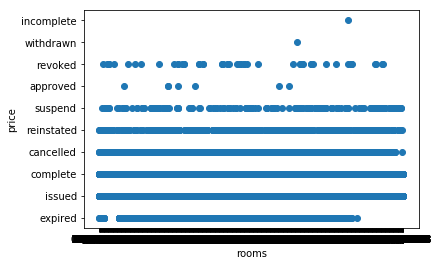

In [7]:
plt.scatter(sf_df['Permit Creation Date'], sf_df['Current Status'])
plt.xlabel('rooms')
plt.ylabel('price')

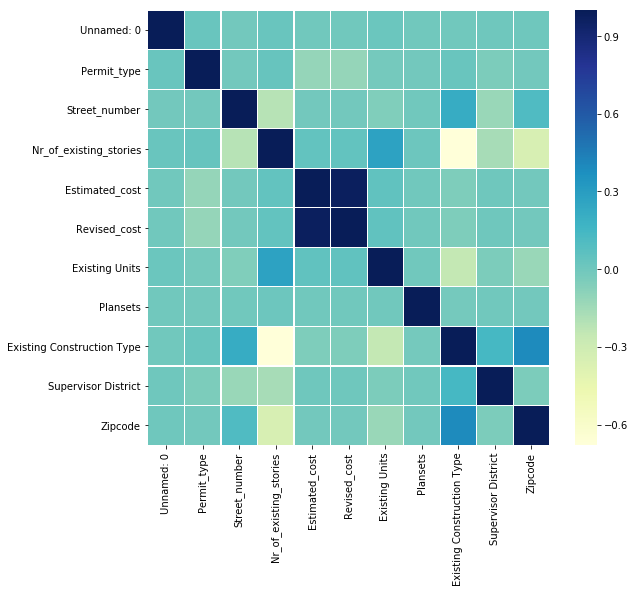

In [8]:
corrmat = sf_df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 